In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
covid = pd.read_csv('C:/Users/tilin/Downloads/archive (2)/Cleaned-Data.csv')
print(covid.shape)
covid.head(3)

(316800, 27)


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China


In [4]:
covid.isna().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [5]:
covid.drop(['None_Experiencing'], axis = 1, inplace = True)
covid.drop(['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+'], axis = 1, inplace = True)
covid.drop(['Gender_Female', 'Gender_Male', 'Gender_Transgender'], axis = 1, inplace = True)
covid.drop(['Contact_Dont-Know', 'Contact_No', 'Contact_Yes'], axis = 1, inplace = True)
covid.drop(['Country'], axis = 1, inplace = True)

covid.head(3)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe
0,1,1,1,1,1,0,1,1,1,1,1,0,0,0
1,1,1,1,1,1,0,1,1,1,1,1,0,0,0
2,1,1,1,1,1,0,1,1,1,1,1,0,0,0


In [6]:
X = covid[['Fever', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea']]
y = covid[['Severity_Severe', 'Severity_Mild', 'Severity_Moderate', 'Severity_None']]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(221760, 9)
(221760, 4)
(95040, 9)
(95040, 4)


In [10]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_depth = 3)
tree_clf.fit(X_train, y_train)

tree_clf.predict(X_test)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int64)

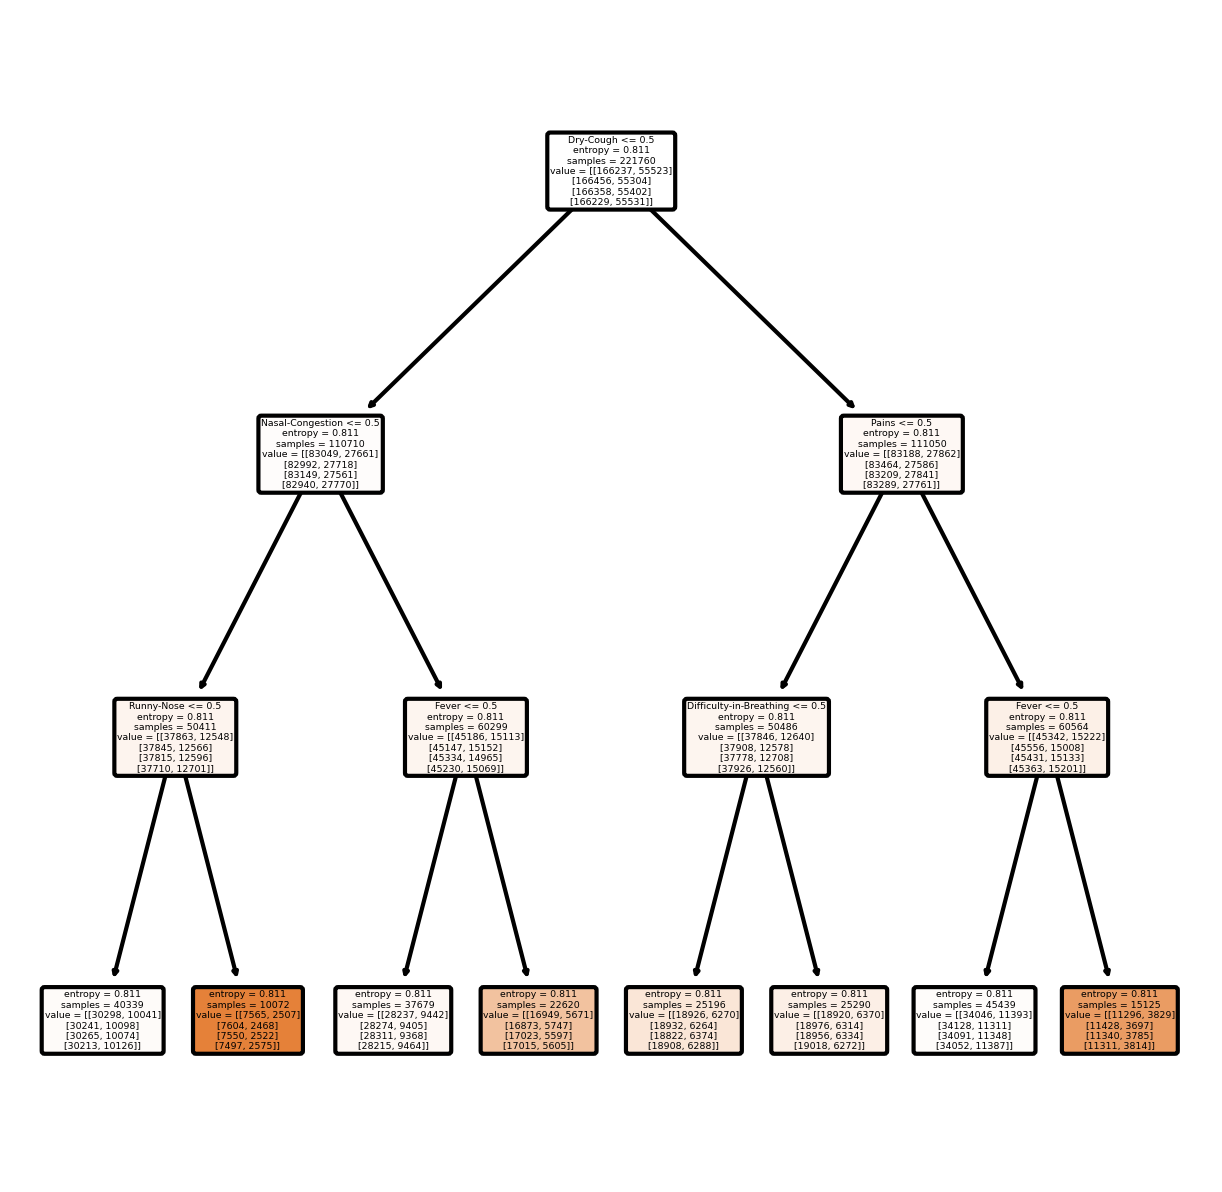

In [14]:
feature_names = covid.columns[:10]
target_names = covid[['Severity_Severe', 'Severity_Mild', 'Severity_Moderate', 'Severity_None']]

from sklearn import tree
from sklearn.tree import plot_tree

plt.figure(figsize=(5,5), dpi = 300)
plot_tree(tree_clf, 
          feature_names = feature_names, 
          class_names = str(target_names), 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 
